In [1]:
import matplotlib.pyplot as plt
import timeit
#import random
#import time
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
rain = pd.read_csv("Data/Rain.csv")

In [3]:
display(rain)
display(rain.info())
display(rain.describe())

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,No
1,7/3/2009,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,No
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,No
3,3/4/2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,No
4,9/9/2010,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,6/14/2011,Perth,10.1,14.2,7.4,3.4,0.0,NNE,46.0,NNE,...,84.0,81.0,1016.2,1014.5,7.0,8.0,10.4,13.9,Yes,Yes
36877,9/24/2010,PerthAirport,6.3,26.0,0.0,5.0,10.6,W,37.0,N,...,38.0,45.0,1024.2,1021.5,1.0,1.0,18.4,23.5,No,No
36878,5/6/2011,Darwin,20.5,31.7,0.0,7.0,11.1,E,37.0,E,...,54.0,39.0,1012.6,1009.0,2.0,5.0,25.7,30.5,No,No
36879,10/12/2010,Perth,6.3,23.3,0.0,5.2,11.6,SSW,39.0,E,...,50.0,41.0,1023.9,1019.9,0.0,1.0,16.4,20.9,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           36881 non-null  object 
 1   Location       36881 non-null  object 
 2   MinTemp        36543 non-null  float64
 3   MaxTemp        36639 non-null  float64
 4   Rainfall       36255 non-null  float64
 5   Evaporation    24035 non-null  float64
 6   Sunshine       23317 non-null  float64
 7   WindGustDir    33513 non-null  object 
 8   WindGustSpeed  33520 non-null  float64
 9   WindDir9am     34072 non-null  object 
 10  WindDir3pm     35919 non-null  object 
 11  WindSpeed9am   36219 non-null  float64
 12  WindSpeed3pm   36235 non-null  float64
 13  Humidity9am    36311 non-null  float64
 14  Humidity3pm    36370 non-null  float64
 15  Pressure9am    33309 non-null  float64
 16  Pressure3pm    33329 non-null  float64
 17  Cloud9am       24381 non-null  float64
 18  Cloud3

None

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,36543.000000,36639.000000,36255.000000,24035.000000,23317.000000,33520.000000,36219.000000,36235.000000,36311.000000,36370.000000,33309.000000,33329.000000,24381.000000,23899.000000,36394.000000,36437.000000
mean,12.235966,22.939491,2.554823,5.189544,7.544688,40.390573,14.217427,18.874928,69.146953,52.307369,1017.283152,1014.967769,4.331488,4.462321,16.905688,21.485808
std,6.389832,6.988266,9.081329,3.765427,3.833809,13.550613,8.997003,8.791849,18.300754,20.317082,7.177877,7.077594,2.848750,2.663067,6.428328,6.820848
min,-8.500000,-3.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,1.000000,982.900000,980.200000,0.000000,0.000000,-5.900000,-5.100000
25%,7.600000,17.800000,0.000000,2.600000,4.700000,31.000000,7.000000,13.000000,58.000000,38.000000,1012.500000,1010.100000,1.000000,2.000000,12.300000,16.500000
50%,12.100000,22.300000,0.000000,4.600000,8.400000,39.000000,13.000000,19.000000,70.000000,53.000000,1017.300000,1015.000000,5.000000,5.000000,16.600000,20.900000
75%,17.000000,27.900000,0.800000,7.000000,10.600000,48.000000,20.000000,24.000000,83.000000,66.000000,1022.200000,1019.800000,7.000000,7.000000,21.500000,26.200000
max,30.500000,48.100000,371.000000,81.200000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,37.700000,46.100000


## Exploring missing values

In [4]:
display(rain.isna().sum()/len(rain)*100)

Date              0.000000
Location          0.000000
MinTemp           0.916461
MaxTemp           0.656164
Rainfall          1.697351
Evaporation      34.830943
Sunshine         36.777745
WindGustDir       9.132073
WindGustSpeed     9.113093
WindDir9am        7.616388
WindDir3pm        2.608389
WindSpeed9am      1.794962
WindSpeed3pm      1.751579
Humidity9am       1.545511
Humidity3pm       1.385537
Pressure9am       9.685204
Pressure3pm       9.630975
Cloud9am         33.892790
Cloud3pm         35.199696
Temp9am           1.320463
Temp3pm           1.203872
RainToday         1.697351
RainTomorrow      1.681082
dtype: float64

In [5]:
rain.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,No
1,7/3/2009,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,No
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,No
3,3/4/2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,No
4,9/9/2010,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,No
5,9/28/2011,Mildura,15.7,27.3,0.0,11.2,5.6,N,65.0,ENE,...,60.0,86.0,1002.0,995.5,8.0,7.0,18.1,18.5,No,Yes
6,10/13/2011,Nuriootpa,9.8,23.9,0.0,4.4,10.5,SE,35.0,ENE,...,53.0,29.0,1017.8,1013.9,3.0,4.0,15.5,23.0,No,No
7,4/8/2010,NorahHead,18.7,27.6,3.0,NaN,NaN,SSE,41.0,WNW,...,78.0,64.0,1013.2,1011.0,NaN,NaN,22.4,24.0,Yes,No
8,10/19/2009,Townsville,23.6,30.1,0.0,11.4,10.8,E,57.0,ESE,...,53.0,48.0,1020.9,1018.0,4.0,2.0,27.4,27.9,No,No
9,2/23/2010,MountGambier,8.5,22.9,1.4,4.2,12.5,SSW,41.0,SSE,...,62.0,41.0,1023.1,1022.1,1.0,2.0,16.4,22.1,Yes,No


In [6]:
rain_nans = rain.loc[(rain["Evaporation"].isnull()==True) & (rain["Sunshine"].isnull()==True)]


In [7]:
#sns.set(style="ticks")
#sns.pairplot(rain_nans)

In [8]:
#sns.pairplot(rain)

<br>

### Exploring "Evaporation" and "Sunshine" in detail. Question: do they add any meaningful value?

<AxesSubplot:xlabel='Evaporation', ylabel='RainToday'>

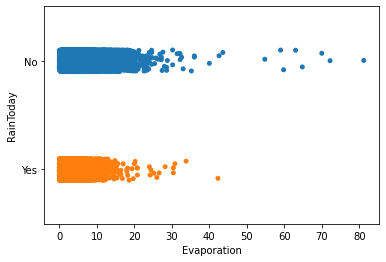

In [9]:
sns.stripplot(x=rain.Evaporation, y=rain.RainToday)

<AxesSubplot:xlabel='Evaporation', ylabel='RainTomorrow'>

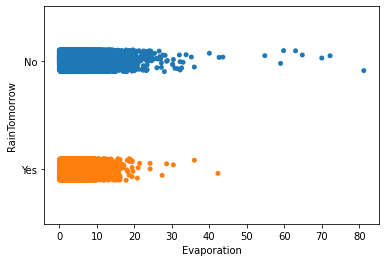

In [10]:
sns.stripplot(x=rain.Evaporation, y=rain.RainTomorrow)

<AxesSubplot:xlabel='Sunshine', ylabel='RainToday'>

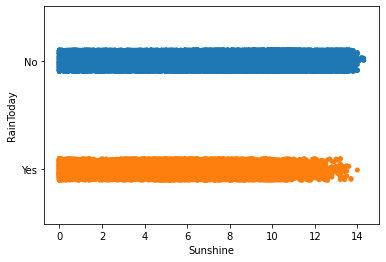

In [11]:
sns.stripplot(x=rain.Sunshine, y=rain.RainToday)

<AxesSubplot:xlabel='Sunshine', ylabel='RainTomorrow'>

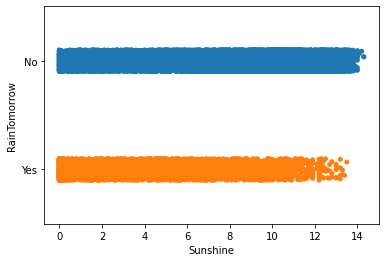

In [12]:
sns.stripplot(x=rain.Sunshine, y=rain.RainTomorrow)

__Sunshine__: it looks like sunshine is no real indicator for "RainTomorrow".

__Evaporation__: how many rows are there that are clearly indicating a "No" for "RainTomorrow"?

In [13]:
display(len(rain.loc[(rain["Evaporation"]>20)]))
display(len(rain.loc[(rain["Evaporation"]>20) & (rain["RainTomorrow"]=="Yes")]))

112

10

#### Decision: drop Sunshine and Evaporation column!

In [14]:
rain_1 = rain.copy().drop(columns=["Sunshine", "Evaporation"])

<br>

### Exploring "Cloud3pm" and "Cloud9pm" in detail. Question: do they add any meaningful value?

<AxesSubplot:xlabel='Cloud9am', ylabel='Count'>

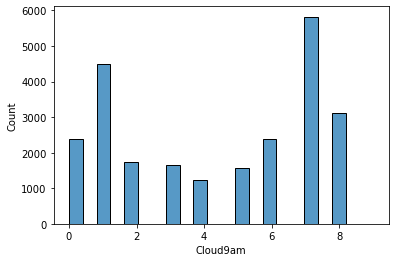

In [15]:
sns.histplot(rain_1.Cloud9am)

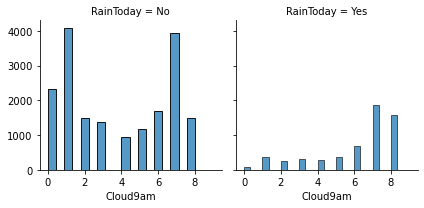

In [16]:
plot = sns.FacetGrid(rain_1, col="RainToday")
plot.map(sns.histplot, "Cloud9am")

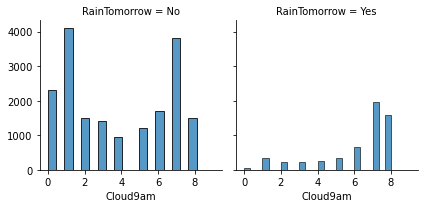

In [17]:
plot = sns.FacetGrid(rain_1, col="RainTomorrow")
plot.map(sns.histplot, "Cloud9am")

<AxesSubplot:xlabel='Cloud3pm', ylabel='Count'>

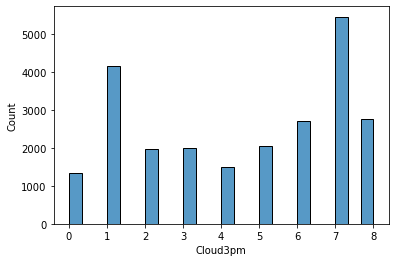

In [18]:
sns.histplot(rain_1.Cloud3pm)

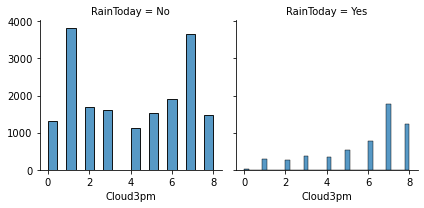

In [19]:
plot = sns.FacetGrid(rain_1, col="RainToday")
plot.map(sns.histplot, "Cloud3pm")

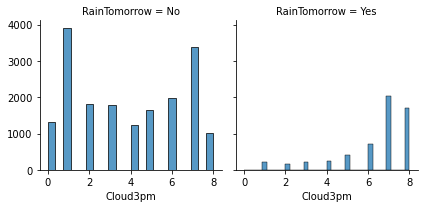

In [20]:
plot = sns.FacetGrid(rain_1, col="RainTomorrow")
plot.map(sns.histplot, "Cloud3pm")

<AxesSubplot:xlabel='Cloud9am', ylabel='RainToday'>

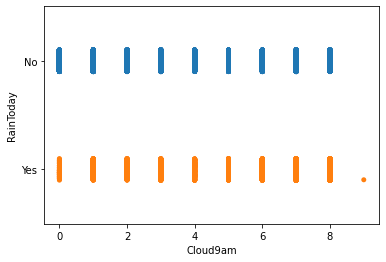

In [21]:
sns.stripplot(x=rain_1.Cloud9am, y=rain_1.RainToday)

<AxesSubplot:xlabel='Cloud9am', ylabel='RainTomorrow'>

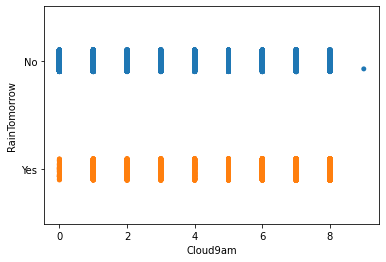

In [22]:
sns.stripplot(x=rain_1.Cloud9am, y=rain_1.RainTomorrow)

<AxesSubplot:xlabel='Cloud3pm', ylabel='RainToday'>

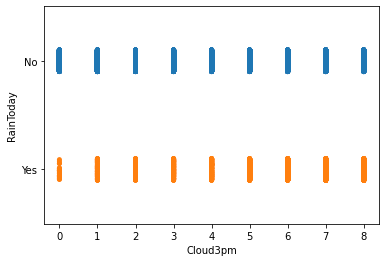

In [23]:
sns.stripplot(x=rain_1.Cloud3pm, y=rain_1.RainToday)

<AxesSubplot:xlabel='Cloud3pm', ylabel='RainTomorrow'>

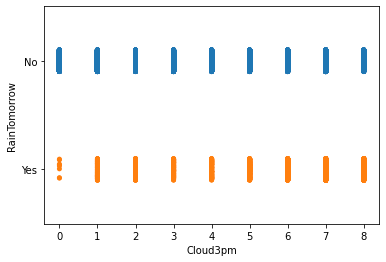

In [24]:
sns.stripplot(x=rain_1.Cloud3pm, y=rain_1.RainTomorrow)

In [25]:
#plot = sns.FacetGrid(rain_1)
#plot.map(sns.stripplot(x="Cloud9am", y="RainToday"))

For __both features__, one can see that a larger value leads to a higher chance of rain today and tomorrow. But 

<AxesSubplot:xlabel='RainToday', ylabel='count'>

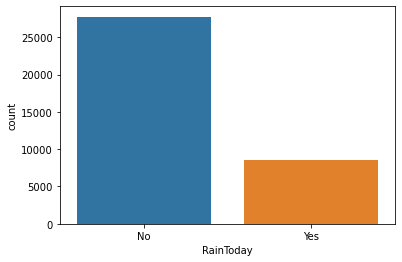

In [26]:
sns.countplot(x=rain.RainToday)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

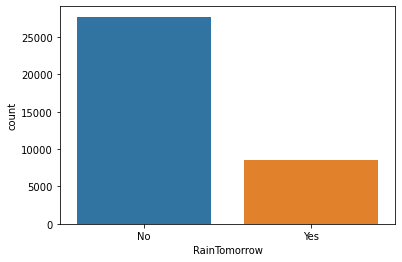

In [27]:
sns.countplot(x=rain.RainTomorrow)

In [28]:
display(rain.RainTomorrow.value_counts())
display(rain.RainToday.value_counts())
display(len(rain.loc[(rain["RainToday"] == "Yes") & (rain["RainTomorrow"] == "Yes")]))
display(len(rain.loc[(rain["RainToday"] == "No") & (rain["RainTomorrow"] == "No")]))

No     27732
Yes     8529
Name: RainTomorrow, dtype: int64

No     27756
Yes     8499
Name: RainToday, dtype: int64

4051

23188

In [29]:
display(rain.Cloud9am.median())
display(rain.Cloud3pm.median())

5.0

5.0

#### Decision: go two ways: for now, replace missing values with median. But also check the classification result later on with dropping the columns altogether!

In [30]:
rain_2 = rain_1.copy().fillna({"Cloud9am": rain_1.Cloud9am.median(), "Cloud3pm": rain_1.Cloud3pm.median()})

Check how much the mean deviated.

In [31]:
display(rain_1.Cloud9am.mean())
display(rain_1.Cloud3pm.mean())
display(rain_2.Cloud9am.mean())
display(rain_2.Cloud3pm.mean())

4.331487633813215

4.46232059918825

4.5580651283858895

4.651582115452401

In [32]:
rain_2

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,5/18/2009,Hobart,5.1,14.3,0.0,NW,30.0,WSW,SSE,7.0,...,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,No
1,7/3/2009,Launceston,1.1,14.5,0.4,SSW,50.0,E,SW,7.0,...,99.0,46.0,1001.5,1002.4,5.0,5.0,1.3,13.7,No,No
2,2/18/2010,Williamtown,19.7,26.2,0.0,SSE,41.0,SSE,SSE,19.0,...,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,No
3,3/4/2010,PerthAirport,16.6,28.0,0.0,SW,54.0,SSE,SW,28.0,...,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,No
4,9/9/2010,GoldCoast,14.6,25.3,0.0,NNW,43.0,WNW,N,6.0,...,64.0,67.0,1020.3,1015.0,5.0,5.0,22.2,22.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,6/14/2011,Perth,10.1,14.2,7.4,NNE,46.0,NNE,N,19.0,...,84.0,81.0,1016.2,1014.5,7.0,8.0,10.4,13.9,Yes,Yes
36877,9/24/2010,PerthAirport,6.3,26.0,0.0,W,37.0,N,WSW,9.0,...,38.0,45.0,1024.2,1021.5,1.0,1.0,18.4,23.5,No,No
36878,5/6/2011,Darwin,20.5,31.7,0.0,E,37.0,E,ESE,20.0,...,54.0,39.0,1012.6,1009.0,2.0,5.0,25.7,30.5,No,No
36879,10/12/2010,Perth,6.3,23.3,0.0,SSW,39.0,E,SSW,9.0,...,50.0,41.0,1023.9,1019.9,0.0,1.0,16.4,20.9,No,No


<br>

### Exploring "WindGustDir", "WindDir9am" and "WindDir3pm"

Now the issue here is, that while every wind direction can be transformed to a measurement of degrees between 0 and 360 (such as radians), it is circular.  
This means that the difference between an angle of 359 and 0 is exactly one step. To properly deal with this we need to split the wind direction features into two features each:  
* one for "northerness" -> transform to radians and apply `cos` -> variable will be between -1 (most southern) and 1 (most northern)
* one for "easterness" -> transform to radians and apply `sin` -> variable will be between -1 (most western) and 1 (most eastern)

Source: https://www.researchgate.net/post/How_to_use_aspects_ie_N_NE_SE_etc_in_PCA_or_CCA_for_analysis_especially_using_PAST
(expand next markdown for a copy of the relevant content)

> To follow up on Andrew Peterson's answer, aspect is really a direction vector in two dimensions and so is made up itself of two variables. These can be rather arbitrary but in ecological work "northness" = cos(aspect) and "eastness" = sin(aspect) are very useful variables.
Make sure that your aspect  -- which is likely measured in degrees as from a DEM in a GIS or in the field as from a compass -- is in radians.  R, ArcMap and even Excel trig functions expect arguments in radians and many an unknowing student and researcher have applied the functions without converting degrees to radians with disastrous results.
To see if your aspect is in degrees do a quick summary or histogram. Anything over about 6.5 is a sign that your aspect is in degrees -- if the range is 0 to 360 then you know for sure it's degrees. If it's 0 to about 6.28 then it's most likely radians.
To convert degrees to radians divide out the degrees with 180 then multiply in the radians with pi (3.14...):
rad = pi*degrees/180
Now applying the cosine function to the radians that came from geographic degrees will generate the "northness" variable and it will be between 1 (due north) and -1 (due south) with zero being neither north nor south in aspect (but rather east or west -- see below).
Applying the sine function to geographic radians gives "eastness", also between zero and one, with +1 directly east and -1 directly west. 
Notice that because cos^2 + sin^2 = 1 that eastness^2 + northness^2 = 1, meaning that it's impossible to have northness = 1 and eastness be anything other than zero.
Hope that's not elaborating the obvious too much, but for most of us ecologists it's been too long since we studied trigonometry!

In [33]:
winddir_dict = {"N":0,
                "NNE":22.5,
                "NE":45,
                "ENE":67.5,
                "E":90,
                "ESE":112.5,
                "SE":135,
                "SSE":157.5,
                "S":180.5,
                "SSW":202.5,
                "SW":225,
                "WSW":247.5,
                "W":270,
                "WNW":292.5,
                "NW":315,
                "NNW":337.5}
rain_3 = rain_2.copy()
for i in ["WindGustDir", "WindDir9am", "WindDir3pm"]:
    rain_3[i] = rain_3[i].map(winddir_dict)
    rain_3[i] = rain_3[i].apply(lambda x: math.pi*x/180)
    rain_3[i+"_n"] = rain_3[i].apply(lambda x: math.cos(x))
    rain_3[i+"_e"] = rain_3[i].apply(lambda x: math.sin(x))
    rain_3 = rain_3.drop(columns=[i])

In [34]:
rain_3

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_n,WindGustDir_e,WindDir9am_n,WindDir9am_e,WindDir3pm_n,WindDir3pm_e
0,5/18/2009,Hobart,5.1,14.3,0.0,30.0,7.0,6.0,65.0,47.0,...,9.1,13.3,No,No,7.071068e-01,-0.707107,-3.826834e-01,-0.923880,-0.923880,0.382683
1,7/3/2009,Launceston,1.1,14.5,0.4,50.0,7.0,24.0,99.0,46.0,...,1.3,13.7,No,No,-9.238795e-01,-0.382683,6.123234e-17,1.000000,-0.707107,-0.707107
2,2/18/2010,Williamtown,19.7,26.2,0.0,41.0,19.0,31.0,48.0,50.0,...,22.7,24.4,No,No,-9.238795e-01,0.382683,-9.238795e-01,0.382683,-0.923880,0.382683
3,3/4/2010,PerthAirport,16.6,28.0,0.0,54.0,28.0,33.0,50.0,41.0,...,20.0,26.1,No,No,-7.071068e-01,-0.707107,-9.238795e-01,0.382683,-0.707107,-0.707107
4,9/9/2010,GoldCoast,14.6,25.3,0.0,43.0,6.0,28.0,64.0,67.0,...,22.2,22.6,No,No,9.238795e-01,-0.382683,3.826834e-01,-0.923880,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,6/14/2011,Perth,10.1,14.2,7.4,46.0,19.0,15.0,84.0,81.0,...,10.4,13.9,Yes,Yes,9.238795e-01,0.382683,9.238795e-01,0.382683,1.000000,0.000000
36877,9/24/2010,PerthAirport,6.3,26.0,0.0,37.0,9.0,26.0,38.0,45.0,...,18.4,23.5,No,No,-1.836970e-16,-1.000000,1.000000e+00,0.000000,-0.382683,-0.923880
36878,5/6/2011,Darwin,20.5,31.7,0.0,37.0,20.0,13.0,54.0,39.0,...,25.7,30.5,No,No,6.123234e-17,1.000000,6.123234e-17,1.000000,-0.382683,0.923880
36879,10/12/2010,Perth,6.3,23.3,0.0,39.0,9.0,20.0,50.0,41.0,...,16.4,20.9,No,No,-9.238795e-01,-0.382683,6.123234e-17,1.000000,-0.923880,-0.382683


In [35]:
rain_3.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,WindGustDir_n,WindGustDir_e,WindDir9am_n,WindDir9am_e,WindDir3pm_n,WindDir3pm_e
count,36543.000000,36639.000000,36255.000000,33520.000000,36219.000000,36235.000000,36311.000000,36370.000000,33309.000000,33329.000000,36881.000000,36881.000000,36394.000000,36437.000000,3.351300e+04,33513.000000,3.407200e+04,34072.000000,3.591900e+04,35919.000000
mean,12.235966,22.939491,2.554823,40.390573,14.217427,18.874928,69.146953,52.307369,1017.283152,1014.967769,4.558065,4.651582,16.905688,21.485808,-5.382489e-02,-0.012704,8.586188e-03,0.021895,-5.275542e-02,-0.005126
std,6.389832,6.988266,9.081329,13.550613,8.997003,8.791849,18.300754,20.317082,7.177877,7.077594,2.337715,2.159043,6.428328,6.820848,7.022904e-01,0.709760,7.172174e-01,0.696474,6.992618e-01,0.712917
min,-8.500000,-3.100000,0.000000,7.000000,0.000000,0.000000,2.000000,1.000000,982.900000,980.200000,0.000000,0.000000,-5.900000,-5.100000,-9.999619e-01,-1.000000,-9.999619e-01,-1.000000,-9.999619e-01,-1.000000
25%,7.600000,17.800000,0.000000,31.000000,7.000000,13.000000,58.000000,38.000000,1012.500000,1010.100000,3.000000,3.000000,12.300000,16.500000,-7.071068e-01,-0.707107,-7.071068e-01,-0.707107,-7.071068e-01,-0.707107
50%,12.100000,22.300000,0.000000,39.000000,13.000000,19.000000,70.000000,53.000000,1017.300000,1015.000000,5.000000,5.000000,16.600000,20.900000,-1.836970e-16,-0.008727,6.123234e-17,0.000000,-1.836970e-16,-0.008727
75%,17.000000,27.900000,0.800000,48.000000,20.000000,24.000000,83.000000,66.000000,1022.200000,1019.800000,6.000000,6.000000,21.500000,26.200000,7.071068e-01,0.707107,7.071068e-01,0.707107,7.071068e-01,0.707107
max,30.500000,48.100000,371.000000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,37.700000,46.100000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000


<br>

### Drop remaining missing values (rows):

Check once again for the amount of missing values per columns:

In [36]:
rain_3.isna().sum()

Date                0
Location            0
MinTemp           338
MaxTemp           242
Rainfall          626
WindGustSpeed    3361
WindSpeed9am      662
WindSpeed3pm      646
Humidity9am       570
Humidity3pm       511
Pressure9am      3572
Pressure3pm      3552
Cloud9am            0
Cloud3pm            0
Temp9am           487
Temp3pm           444
RainToday         626
RainTomorrow      620
WindGustDir_n    3368
WindGustDir_e    3368
WindDir9am_n     2809
WindDir9am_e     2809
WindDir3pm_n      962
WindDir3pm_e      962
dtype: int64

An __alternative approach__ would be to fill with median/mean. But as the dataset contains ~37000 Entries, dropping ~3000-8000 rows is acceptable.

In [37]:
# create dataset without NaNs
rain_4 = rain_3.copy().dropna()

<br>

## Pre-Processing Data

Transform target value & drop Date & Location column.  
__Note: it might be helpful to divide a year into seasons. BUT I think this might correlate with other factors too much and thus overweighting the effect of the season?__

In [38]:
rain_5 = rain_4.copy().drop(columns=["Date", "Location"])
for i in ["RainToday", "RainTomorrow"]:
    rain_5[i] = rain_5[i].map({"Yes":1, "No":0})

In [39]:
rain_5

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_n,WindGustDir_e,WindDir9am_n,WindDir9am_e,WindDir3pm_n,WindDir3pm_e
0,5.1,14.3,0.0,30.0,7.0,6.0,65.0,47.0,1023.1,1022.2,...,9.1,13.3,0,0,7.071068e-01,-0.707107,-3.826834e-01,-0.923880,-0.923880,0.382683
1,1.1,14.5,0.4,50.0,7.0,24.0,99.0,46.0,1001.5,1002.4,...,1.3,13.7,0,0,-9.238795e-01,-0.382683,6.123234e-17,1.000000,-0.707107,-0.707107
2,19.7,26.2,0.0,41.0,19.0,31.0,48.0,50.0,1020.9,1021.9,...,22.7,24.4,0,0,-9.238795e-01,0.382683,-9.238795e-01,0.382683,-0.923880,0.382683
3,16.6,28.0,0.0,54.0,28.0,33.0,50.0,41.0,1018.3,1014.9,...,20.0,26.1,0,0,-7.071068e-01,-0.707107,-9.238795e-01,0.382683,-0.707107,-0.707107
4,14.6,25.3,0.0,43.0,6.0,28.0,64.0,67.0,1020.3,1015.0,...,22.2,22.6,0,0,9.238795e-01,-0.382683,3.826834e-01,-0.923880,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,10.1,14.2,7.4,46.0,19.0,15.0,84.0,81.0,1016.2,1014.5,...,10.4,13.9,1,1,9.238795e-01,0.382683,9.238795e-01,0.382683,1.000000,0.000000
36877,6.3,26.0,0.0,37.0,9.0,26.0,38.0,45.0,1024.2,1021.5,...,18.4,23.5,0,0,-1.836970e-16,-1.000000,1.000000e+00,0.000000,-0.382683,-0.923880
36878,20.5,31.7,0.0,37.0,20.0,13.0,54.0,39.0,1012.6,1009.0,...,25.7,30.5,0,0,6.123234e-17,1.000000,6.123234e-17,1.000000,-0.382683,0.923880
36879,6.3,23.3,0.0,39.0,9.0,20.0,50.0,41.0,1023.9,1019.9,...,16.4,20.9,0,0,-9.238795e-01,-0.382683,6.123234e-17,1.000000,-0.923880,-0.382683


### Normalizing data.

In [40]:
nscaler = preprocessing.MinMaxScaler()
rain_6 = pd.DataFrame(nscaler.fit_transform(rain_5), index=rain_5.index, columns=rain_5.columns)

In [41]:
rain_6

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_n,WindGustDir_e,WindDir9am_n,WindDir9am_e,WindDir3pm_n,WindDir3pm_e
0,0.320856,0.231818,0.000000,0.193277,0.058824,0.047059,0.642857,0.464646,0.691910,0.707071,...,0.262887,0.226415,0.0,0.0,0.853551,0.146447,0.308645,0.038060,0.038042,0.691342
1,0.213904,0.236364,0.001088,0.361345,0.058824,0.258824,0.989796,0.454545,0.320138,0.373737,...,0.061856,0.235849,0.0,0.0,0.038042,0.308658,0.499990,1.000000,0.146430,0.146447
2,0.711230,0.502273,0.000000,0.285714,0.200000,0.341176,0.469388,0.494949,0.654045,0.702020,...,0.613402,0.488208,0.0,0.0,0.038042,0.691342,0.038042,0.691342,0.038042,0.691342
3,0.628342,0.543182,0.000000,0.394958,0.305882,0.364706,0.489796,0.404040,0.609294,0.584175,...,0.543814,0.528302,0.0,0.0,0.146430,0.146447,0.038042,0.691342,0.146430,0.146447
4,0.574866,0.481818,0.000000,0.302521,0.047059,0.305882,0.632653,0.666667,0.643718,0.585859,...,0.600515,0.445755,0.0,0.0,0.961939,0.308658,0.691336,0.038060,1.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,0.454545,0.229545,0.020131,0.327731,0.200000,0.152941,0.836735,0.808081,0.573150,0.577441,...,0.296392,0.240566,1.0,1.0,0.961939,0.691342,0.961939,0.691342,1.000000,0.500000
36877,0.352941,0.497727,0.000000,0.252101,0.082353,0.282353,0.367347,0.444444,0.710843,0.695286,...,0.502577,0.466981,0.0,0.0,0.499990,0.000000,1.000000,0.500000,0.308645,0.038060
36878,0.732620,0.627273,0.000000,0.252101,0.211765,0.129412,0.530612,0.383838,0.511188,0.484848,...,0.690722,0.632075,0.0,0.0,0.499990,1.000000,0.499990,1.000000,0.308645,0.961940
36879,0.352941,0.436364,0.000000,0.268908,0.082353,0.211765,0.489796,0.404040,0.705680,0.668350,...,0.451031,0.405660,0.0,0.0,0.038042,0.308658,0.499990,1.000000,0.038042,0.308658


<br>

### Partition our data

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(rain_6.drop(columns=["RainTomorrow"]), rain_6["RainTomorrow"], stratify=rain_6["RainTomorrow"], test_size=0.3, random_state=0)

Check, if ratio of values of our target variable is the same in test and train set:

In [43]:
#print(Y_train.value_counts()[0]/Y_train.value_counts()[1])
#print(Y_test.value_counts()[0]/Y_test.value_counts()[1])

<br>

## Apply models using cross-validation:

Define functions:

In [138]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



def cv_report(X_train, Y_train, X_test, Y_test, model, model_name, cv_no):
    accuracies = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv_no)
    print(model_name)
    print(accuracies)
    acc_mean = accuracies.mean()
    acc_std = accuracies.std()
    model.fit(X_train, Y_train)
    Y_test_pred = model.predict(X_test)
    accte = accuracy_score(Y_test, Y_test_pred)
    print(accte, "\n")
    return [model_name, acc_mean, acc_std, accte]


def cv_gridsearch(X_train, Y_train, estimator, param_grid, cv):
    print(str(estimator))
    gs_model = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv)
    return [str(estimator), gs_model.fit(X_train, Y_train).best_params_]

def cv_report_list(X_train, Y_train, X_test, Y_test, model_list, cv):
    report = pd.DataFrame(columns=['Model', 'Mean Acc. Training', 'Standard Deviation', 'Acc. Test'])
    for i in model_list:
        report.loc[len(report)] = cv_report(X_train, Y_train, X_test, Y_test, i[0], i[1], cv)
    return report


def cv_gridsearch_list(X_train, Y_train, model_param_grid, cv):
    report = pd.DataFrame(columns=["Model", "Best_Params"])
    for i in model_param_grid:
        report.loc[len(report)] = cv_gridsearch(X_train, Y_train, i[0], i[1], cv)
    return report

def get_example_cv_gridsearch_list():
    model_param_grid = [
        [LogisticRegression(), {
            "max_iter":[150, 200, 250]
        }],
        [DecisionTreeClassifier(),{
            "criterion":["entropy","gini"],
            "max_depth": [3, 5, 7, 10, 15, 20],
            "random_state": [0]
        }],
        [RandomForestClassifier(),{
            "max_depth": [3, 4, 5, 6, 7, 8, 12, 20],
            "n_estimators": [10, 50, 100, 150, 200],
            "random_state": [0]
        }]
    ]
    return model_param_grid


def get_example_cv_report_list():
    model_list = [
        [LogisticRegression(max_iter=200), 'Logistic Regression'],
        [GaussianNB(), 'Naive Bayes'],
        [DecisionTreeClassifier(criterion='entropy', random_state=0), 'Decision Tree C5.0']
    ]
    return model_list


print(get_example_cv_gridsearch_list())
print(get_example_cv_report_list())

[[LogisticRegression(), {'max_iter': [150, 200, 250]}], [DecisionTreeClassifier(), {'criterion': ['entropy', 'gini'], 'max_depth': [3, 5, 7, 10, 15, 20], 'random_state': [0]}], [RandomForestClassifier(), {'max_depth': [3, 4, 5, 6, 7, 8, 12, 20], 'n_estimators': [10, 50, 100, 150, 200], 'random_state': [0]}]]
[[LogisticRegression(max_iter=200), 'Logistic Regression'], [GaussianNB(), 'Naive Bayes'], [DecisionTreeClassifier(criterion='entropy', random_state=0), 'Decision Tree C5.0']]


### Support-Vector machines:

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# model
#lrmodel = LogisticRegression(max_iter=200)

# execute cross-validation & calculate mean & std
#accuracies = cross_val_score(lrmodel, X_train, Y_train, scoring='accuracy', cv=10)
#print(accuracies)
#acc_mean = accuracies.mean()
#acc_std = accuracies.std()
# fit on train data
#lrmodel.fit(X_train, Y_train)
# predict for test set
#Y_test_pred = lrmodel.predict(X_test)
#accte = accuracy_score(Y_test, Y_test_pred)
#print(accte)

# add to report
#report.loc[len(report)] = ['Logistic Regression', acc_mean, acc_std, accte]

[0.85034688 0.83936539 0.83886961 0.84035697 0.84283589 0.85473475
 0.8532474  0.84729797 0.84283589 0.86117997]
0.8459224985540775


In [47]:
display(report)

,Model,Mean Acc. Training,Standard Deviation,Acc. Test
0,Logistic Regression,0.847107,0.007171,0.845922


In [48]:
cv_report(X_train, Y_train, X_test, Y_test, LogisticRegression(max_iter=200), 'Logistic Regression', 10, report)

[0.85034688 0.83936539 0.83886961 0.84035697 0.84283589 0.85473475
 0.8532474  0.84729797 0.84283589 0.86117997]
0.8459224985540775


In [49]:
display(report)

,Model,Mean Acc. Training,Standard Deviation,Acc. Test
0,Logistic Regression,0.847107,0.007171,0.845922
1,Logistic Regression,0.847107,0.007171,0.845922


<br>

### Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB

cv_report(X_train, Y_train, X_test, Y_test, GaussianNB(), 'Naive Bayes', 10, report)

[0.82507433 0.80267724 0.80862667 0.8006941  0.80515617 0.80664353
 0.82002975 0.80713932 0.79771939 0.81705503]
0.804626951995373


In [51]:
print(report)

                 Model  Mean Acc. Training  Standard Deviation  Acc. Test
0  Logistic Regression            0.847107            0.007171   0.845922
1  Logistic Regression            0.847107            0.007171   0.845922
2          Naive Bayes            0.809082            0.008396   0.804627


<br>

### Decision Trees

In [52]:
from sklearn.tree import DecisionTreeClassifier

cv_report(X_train, Y_train, X_test, Y_test, DecisionTreeClassifier(criterion='entropy', random_state=0), 'Decision Tree C5.0', 10, report)

[0.79435084 0.79672781 0.79127417 0.79077838 0.77094695 0.77094695
 0.78135845 0.78185424 0.77838374 0.79623203]
0.7871602082128398


In [53]:
print(report)

                 Model  Mean Acc. Training  Standard Deviation  Acc. Test
0  Logistic Regression            0.847107            0.007171   0.845922
1  Logistic Regression            0.847107            0.007171   0.845922
2          Naive Bayes            0.809082            0.008396   0.804627
3   Decision Tree C5.0            0.785285            0.009407   0.787160


<br>

### Altogether

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

model_list = [
    [LogisticRegression(max_iter=200), 'Logistic Regression'], 
    [GaussianNB(), 'Naive Bayes'], 
    [DecisionTreeClassifier(criterion='entropy', random_state=0), 'Decision Tree C5.0']
    #[GradientBoostingClassifier(random_state=0), 'Gradient Boosted Tree'],
    #[RandomForestClassifier(random_state=0), 'Random Forest']
]

cv_report_list(X_train, Y_train, X_test, Y_test, model_list, 10)

Logistic Regression
[0.85034688 0.83936539 0.83886961 0.84035697 0.84283589 0.85473475
 0.8532474  0.84729797 0.84283589 0.86117997]
0.8459224985540775 

Naive Bayes
[0.82507433 0.80267724 0.80862667 0.8006941  0.80515617 0.80664353
 0.82002975 0.80713932 0.79771939 0.81705503]
0.804626951995373 

Decision Tree C5.0
[0.79435084 0.79672781 0.79127417 0.79077838 0.77094695 0.77094695
 0.78135845 0.78185424 0.77838374 0.79623203]
0.7871602082128398 



,Model,Mean Acc. Training,Standard Deviation,Acc. Test
0,Logistic Regression,0.847107,0.007171,0.845922
1,Naive Bayes,0.809082,0.008396,0.804627
2,Decision Tree C5.0,0.785285,0.009407,0.787160


In [106]:
display(report)

,Model,Mean Acc. Training,Standard Deviation,Acc. Test


In [105]:
# clear report
report = report.iloc[0:0].copy()

<br>

### GridSearchCV

In [141]:
model_param_grid = [
    [LogisticRegression(), {
        "max_iter":[150, 200, 250]
    }],
    [DecisionTreeClassifier(),{
        "criterion":["entropy","gini"],
        #"learning_rate":[0.2,0.5,1.,2.,5.,10.,20.],
        "max_depth": [3, 5, 7, 10, 15, 20],
        "random_state": [0]
    }]
    #[RandomForestClassifier(),{
    #    "max_depth": [3, 4, 5, 6, 7, 8, 12, 20],
    #    "n_estimators": [10, 50, 100, 150, 200],
    #    "random_state": [0]
    #}],
    #[]
]

cv_gridsearch_list(X_train, Y_train, model_param_grid, 10)

LogisticRegression()
DecisionTreeClassifier()


,Model,Best_Params
0,LogisticRegression(),{'max_iter': 150}
1,DecisionTreeClassifier(),"{'criterion': 'gini', 'max_depth': 5, 'random_..."
